#  Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94).

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
# import pandas

import pandas as pd


In [2]:
# read the file using pandas

traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

# examine the dataframe

traffic.info()
traffic.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


We can say from the above above observation it has 48204 rows and 9 columns

### Analyzing Traffic Volume

First step in analyzing is that the data should be easy to read. To achieve this we can use visualisation method such as graph.

In [3]:
# import matplotlib to generate graph

import matplotlib.pyplot as plt

# to make jupyter generate graph

%matplotlib inline


Lets plot a histogram for the *traffic_volume* column

<Axes: ylabel='Frequency'>

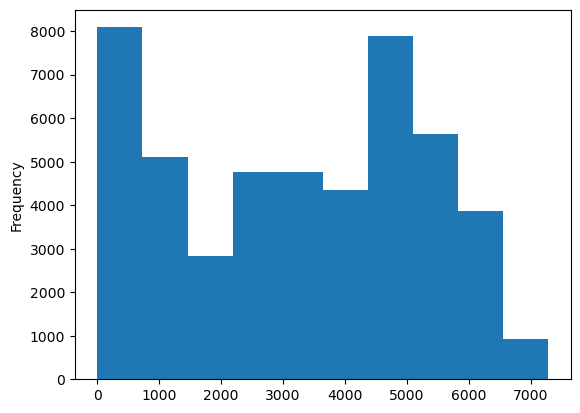

In [4]:
(traffic["traffic_volume"]).plot.hist()

In [5]:
# lets see what type of column is traffic_volume

traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can note down that the max value is 7280 and the min value is 0.
Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00 the average traffic volume is  3260 vehicles.This is on hourly basis.

### Traffic Volume: Day vs. Night

1. About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
2. About 75% of the time, the traffic volume was four times as much (4,933 cars or more).

This possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data.

In [6]:
# change the date_time column to datetime format

traffic["date_time"] = pd.to_datetime(traffic["date_time"])



We'll start by dividing the dataset into two parts:

1. Daytime data: hours from 7 AM to 7 PM (12 hours)
2. Nighttime data: hours from 7 PM to 7 AM (12 hours)

In [7]:
# daytime
 
day = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
print(day.shape)

# nighttime

night = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]
print(night.shape)


(23877, 9)
(24327, 9)


###   Traffic Volume: Day vs. Night (II)

Now we're going to compare the traffic volume at night and during day.

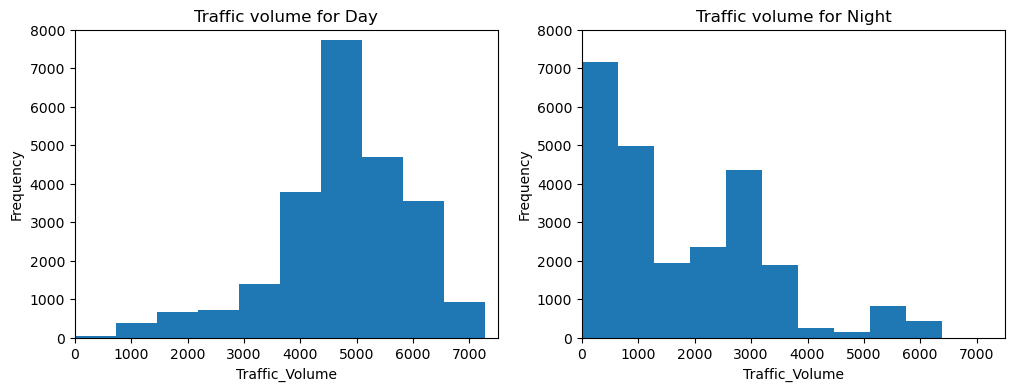

In [8]:
# histogram on a grid chart (To compare night and day) 

plt.figure(figsize=(12, 4))            # size of the figure in grid

# for day

plt.subplot(1,2,1)
plt.hist(day["traffic_volume"])
plt.xlim(0,7500)
plt.ylim(0,8000)
plt.title("Traffic volume for Day")
plt.xlabel("Traffic_Volume")
plt.ylabel("Frequency")

# for night
 
plt.subplot(1,2,2)                    # grid specification
plt.hist(night["traffic_volume"])     # generate histogram
plt.xlim(0,7500)                      # x axis limits
plt.ylim(0,8000)                      # y axis limits
plt.title("Traffic volume for Night") # title for the graph
plt.xlabel("Traffic_Volume")          # x axis name
plt.ylabel("Frequency")               # y ais name

plt.show()

In [9]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [10]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

From the above histogram we can say that the day is left skewed (the number decrease from right to left).It indicates that the traffic is high in day time. There is an average of 4762 vehicles passing the station ecach hour.For 75% of time in each hour more than 4820 vehicles pass station.

The night time is right skewed. This means the traffic is low in night time

Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

### Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changes according to the following:

1. Month
2. Day of the week
3. Time of day

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\1089031275.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()  # to group the dataset by the month column with the mean as an aggregate function.


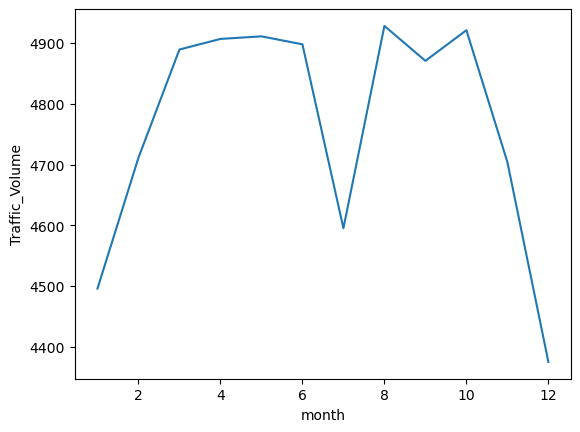

In [11]:
day['month'] = day['date_time'].dt.month # to create a new column where each value describes the month when the traffic volume measurement was taken.
by_month = day.groupby('month').mean()  # to group the dataset by the month column with the mean as an aggregate function.
by_month['traffic_volume'].plot.line()
plt.ylabel("Traffic_Volume")
plt.show()

From this graph we can say that traffic is low in the months November-Febraury (Winter months). Traffic very high in March-October(Summer months).

There is an unusual anamoly in the month of July. Lets find what is this strange occurance.

Lets check july in every year

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\9522767.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  july.groupby('year').mean()["traffic_volume"].plot.line()


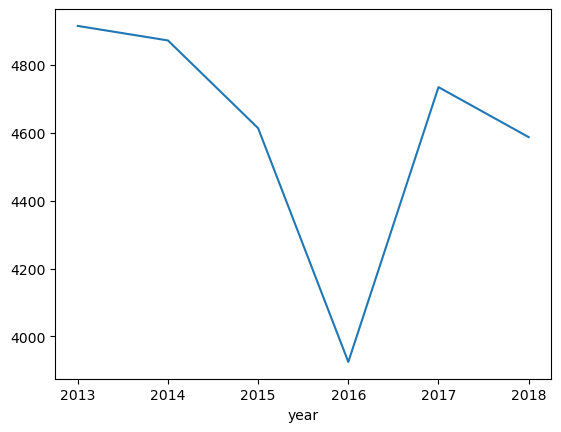

In [12]:
day["year"] = day["date_time"].dt.year
july = day[day["month"]==7]
july.groupby('year').mean()["traffic_volume"].plot.line()
plt.show()


Even in July the traffic was high. The only year-2016 has another reason for this month. After some google searching we can say that it was [due to bridge construction](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).So the traffic was diverted from this route.

### Time Indicators (II)

We'll now continue with building line plots for another time unit: day of the week.

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\3981370976.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek= day.groupby('dayofweek').mean()


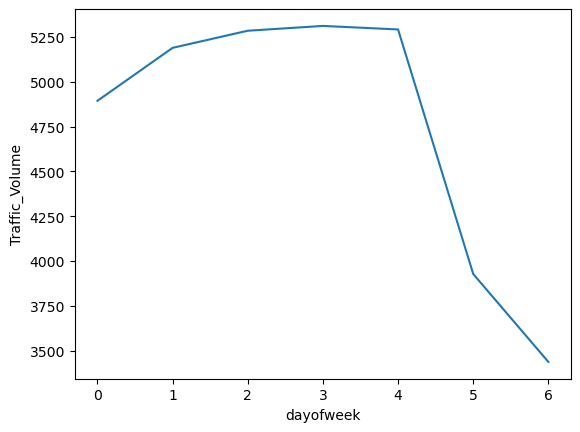

In [13]:
day["dayofweek"] = day['date_time'].dt.dayofweek
by_dayofweek= day.groupby('dayofweek').mean()
by_dayofweek["traffic_volume"].plot.line()  # 0 is first day - monday, 6 - sunday
plt.ylabel("Traffic_Volume")
plt.show()

Analyzing from the graph, traffic was high during *monday-friday*. And then starts to reduce in saturday and sunday (weekend).

### Time Indicators (III)

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\1022454990.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = bussiness_days.groupby('hour').mean()
C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\1022454990.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


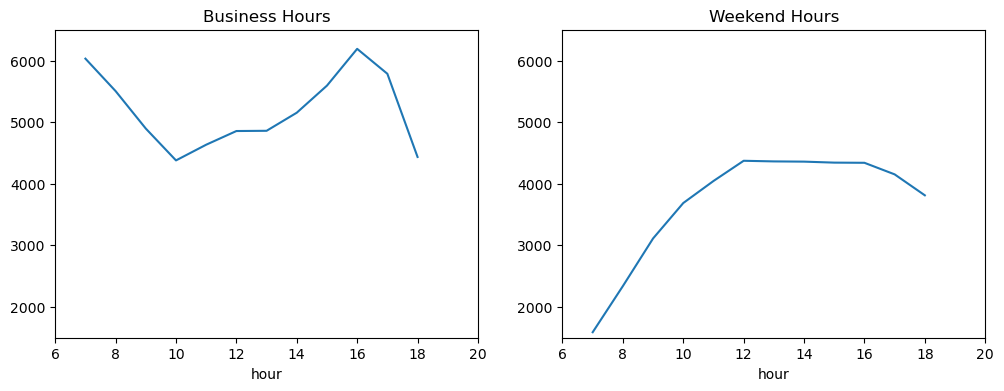

In [14]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
by_hour_business["traffic_volume"].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title("Business Hours")

plt.subplot(1,2,2)
by_hour_weekend["traffic_volume"].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title("Weekend Hours")

plt.show()

At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

To summarize, we found a few time-related indicators of heavy traffic:

1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to weekends.
3. On business days, the rush hours are around 7 and 16.

### Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [15]:
# check the correlation of triffic_volume with other column

day.corr()["traffic_volume"]

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\614090086.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()["traffic_volume"]


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The temperature shows a positive correlation with the traffic_volume than others (rain_1h ,snow_1h ,clouds_all )

Lets generate a scatter plot for temperature and traffic_volume.

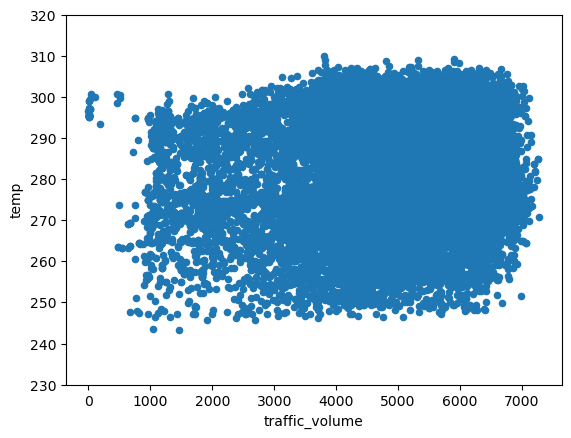

In [16]:
day.plot.scatter("traffic_volume","temp")
plt.ylim(230,320)
plt.show()

We can't come to a conclusion with just the temperature factor.

Let's now look at the other weather-related columns: weather_main and weather_description.

###  Weather Types

We're going to calculate the average traffic volume associated with each unique value in these two columns.

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\3555645617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()


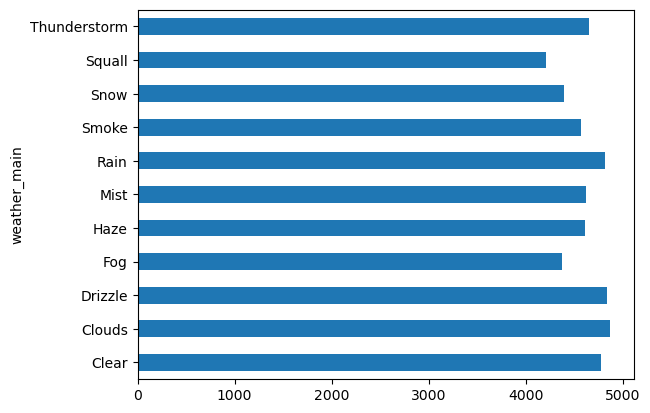

In [17]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main["traffic_volume"].plot.barh() 
plt.show()

It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

C:\Users\hari1\AppData\Local\Temp\ipykernel_9504\367254740.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


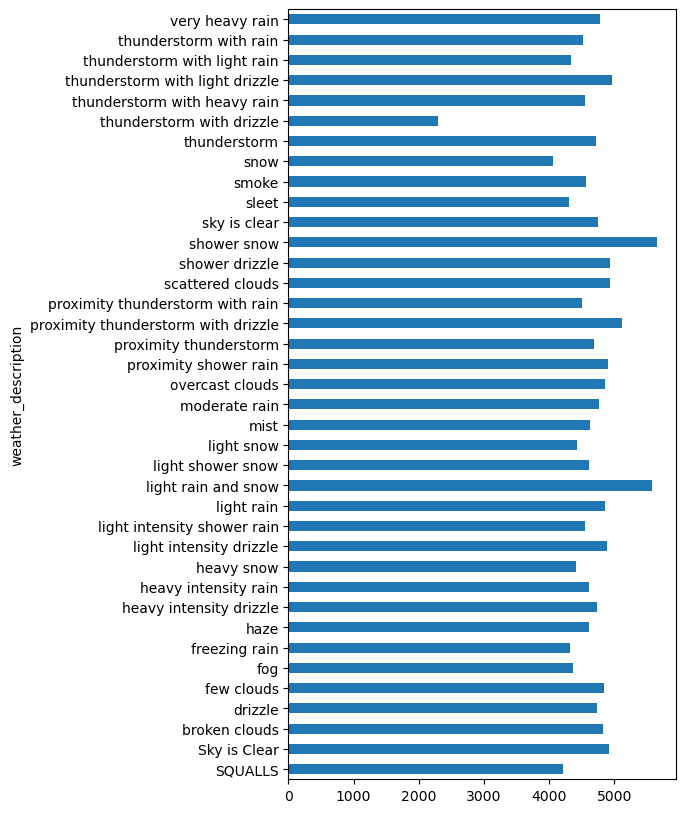

In [18]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10)) # adjust the size of the graph
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

1. Shower snow
2. Light rain and snow

We just found some reasons leading to high traffic in day time . There may be even different reasons other than this.

### Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators:

1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to the weekends.
3. On business days, the rush hours are around 7 and 16.

Weather indicators:

1. Shower snow
2. Light rain and snow
